<a href="https://colab.research.google.com/github/CoderMohitSinha/Computer-Vision/blob/main/Problem1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.datasets import mnist
import numpy as np
from keras import models
from keras import layers
from keras.utils import np_utils
from keras import optimizers
from keras import regularizers
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [5]:
def one_hot(vec,num_classes=10):
    m = vec.shape[0]
    oh_vec = np.zeros((m,num_classes))
    for i in range(0,m):
        oh_vec[i,vec[i]] = 1
    return oh_vec

In [6]:
# (train_data, train_labels), (test_data, test_labels) = mnist.load_data()
# perm = np.random.permutation(train_data.shape[0])
# train_data = train_data[perm,:,:]
# train_labels=train_labels[perm]
# num_train = 60000
# # x_train = train_data[:num_train,:,:]
# # x_train = x_train.reshape(x_train.shape[0],784)
# # x_validate = train_data[num_train:,:,:]
# # x_validate = x_validate.reshape(x_validate.shape[0],784)
# y_train = one_hot(train_labels[:num_train])
# y_validate = one_hot(train_labels[num_train:])

# load in data from mnist dataset (60k training, 10k test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape and convert to one-hot
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.16, random_state=42)

In [7]:
# x_test = test_data
# x_test = x_test.reshape(x_test.shape[0],784)
# y_test = one_hot(test_labels)

In [8]:
model = models.Sequential()
model.add(layers.Dense(500,kernel_regularizer=regularizers.l2(0.0005), activation='relu',input_shape=(784,)))
model.add(layers.Dropout(0.15))
model.add(layers.Dense(500,kernel_regularizer=regularizers.l2(0.0005), activation='relu'))
model.add(layers.Dropout(0.15))
model.add(layers.Dense(10,activation='softmax'))

In [9]:
optimizer = optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
epochs = 250

In [10]:
history = model.fit(x=x_train,y=y_train,epochs=epochs,batch_size=512,verbose=2,validation_data=(x_validate,y_validate))
print("Finished fitting.")


Epoch 1/250
99/99 - 5s - loss: 8.3262 - accuracy: 0.8330 - val_loss: 1.2192 - val_accuracy: 0.9353
Epoch 2/250
99/99 - 5s - loss: 1.3764 - accuracy: 0.9172 - val_loss: 0.9444 - val_accuracy: 0.9484
Epoch 3/250
99/99 - 4s - loss: 1.0058 - accuracy: 0.9369 - val_loss: 0.8149 - val_accuracy: 0.9585
Epoch 4/250
99/99 - 4s - loss: 0.8493 - accuracy: 0.9476 - val_loss: 0.7633 - val_accuracy: 0.9593
Epoch 5/250
99/99 - 4s - loss: 0.7346 - accuracy: 0.9573 - val_loss: 0.7369 - val_accuracy: 0.9607
Epoch 6/250
99/99 - 4s - loss: 0.6796 - accuracy: 0.9618 - val_loss: 0.6956 - val_accuracy: 0.9624
Epoch 7/250
99/99 - 4s - loss: 0.6224 - accuracy: 0.9674 - val_loss: 0.6788 - val_accuracy: 0.9638
Epoch 8/250
99/99 - 4s - loss: 0.5891 - accuracy: 0.9699 - val_loss: 0.6759 - val_accuracy: 0.9651
Epoch 9/250
99/99 - 4s - loss: 0.5652 - accuracy: 0.9739 - val_loss: 0.6481 - val_accuracy: 0.9683
Epoch 10/250
99/99 - 4s - loss: 0.5318 - accuracy: 0.9764 - val_loss: 0.6141 - val_accuracy: 0.9699
Epoch 11/

Text(0, 0.5, 'Accuracy')

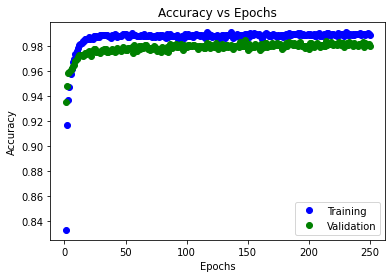

In [15]:
epochs = range(1, 251)
hist_dict = history.history
plt.title("Accuracy vs Epochs")
plt.plot(epochs,hist_dict["accuracy"],'bo',label="Training")
plt.plot(epochs,hist_dict["val_accuracy"],'go',label="Validation")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [16]:
print("Checking accuracy on test set...")
acc = model.evaluate(x_test,y_test,batch_size=512)
print("Accuracy on test set: " + str(acc[1]))
plt.show()

Checking accuracy on test set...
20/20 [==============================] - 0s 15ms/step - loss: 0.1637 - accuracy: 0.9784
Accuracy on test set: 0.9783999919891357
